# Applying Recurrent Neural Network for Predicting Google Stock Price

In this project, recurrent neural network (RNN) deep learning method is applied to the daily time series data of opening google stock prices between January 2012 and December 2016 to predict the prices for January 2017.The type of RNN model used for this project long-short term memory (LSTM) with window size of 60 days.  The dataset used here is obtained from "Deep Learning A-Z 2023: Neural Networks, AI & ChatGPT Prize" course. The model performance is evaluated by measuring root mean square error(RMSE) for the month of January 2017. The model is able to predict the prices with high accuracy
 

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('C:\homa\python\Part 3 - Recurrent Neural Networks\Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [4]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [7]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [8]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [12]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [13]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [14]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 8s 55ms/step - loss: 0.0317
Epoch 2/100
38/38 [==============================] - 2s 52ms/step - loss: 0.0069
Epoch 3/100
38/38 [==============================] - 2s 52ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 2s 52ms/step - loss: 0.0063
Epoch 5/100
38/38 [==============================] - 2s 52ms/step - loss: 0.0055
Epoch 6/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 2s 52ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 2s 54ms/step - loss: 0.0042
Epoch 9/100
38/38 [==============================] - 2s 54ms/step - loss: 0.0048
Epoch 10/100
38/38 [==============================] - 2s 53ms/step - loss: 0.0048
Epoch 11/100
38/38 [==============================] - 2s 52ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 2s 52ms/step - loss: 0.0041
Epoch 13/100
38/38 [=====

## Part 3 - Making the predictions, evaluating  and visualising the results

### Getting the real stock price of 2017

In [15]:
dataset_test = pd.read_csv('C:\homa\python\Part 3 - Recurrent Neural Networks\Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [16]:
test_set_scaled = sc.fit_transform(real_stock_price)

### Getting the predicted stock price of 2017

In [17]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


In [22]:
trainPredict=regressor.predict(X_train)

38/38 [==============================] - 1s 18ms/step


### Evaluating and Visualising the results

In [23]:
from sklearn.metrics import mean_squared_error

In [28]:
trainScore = np.sqrt(mean_squared_error(y_train, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.03 RMSE
Test Score: 13.51 RMSE


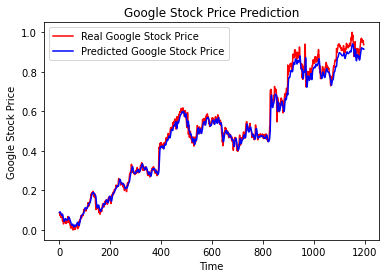

In [31]:
plt.plot(y_train, color = 'red', label = 'Real Google Stock Price')
plt.plot(trainPredict, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

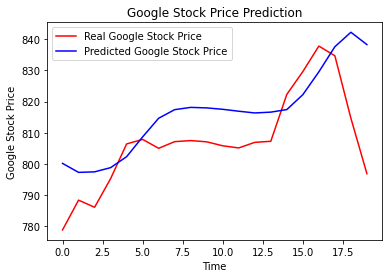

In [21]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()